In [1]:
# Importación de librerias
from langgraph.graph import START, END, StateGraph
from langgraph.types import Command
from langgraph.prebuilt import create_react_agent
from langchain_core.messages import HumanMessage
from langchain_openai import ChatOpenAI
from langchain_community.tools.tavily_search import TavilySearchResults
from dotenv import load_dotenv, find_dotenv
from typing import TypedDict, Optional, Dict, List, Literal, Annotated
from operator import add
from IPython.display import Image, display


In [2]:
# Carga de variables de entorno
dotenv_path = find_dotenv()
load_dotenv(dotenv_path)

True

In [3]:
# Crear Estados para cada nodo
# Estado global que será compartido por all el sistema 
class GlobalState(TypedDict):
    graph_state: str
    messages: str
# Estado para el Buker
class BukerState(TypedDict):
    buker_state: List[str]
# Estado para el Planner
class PlannerState(TypedDict):
    planner_state: List[str]
# Estado para el reglamento
class ReglamentoState(TypedDict):
    reglamento_state: List[str]

# Estado para el feedback    
class FeedbackState(TypedDict):
    feedback_state: List[str]

In [16]:
# Agente supervisor quien interactua directamente con el usuario 
def supervisor(state: GlobalState) -> Command:
    """
    Toma la información del estado global para trabajar y luego dirigir el flujo al siguiente Nodo
    """
    # Logíca del Nodo
    pass

# Este será un conditional_edge para el flujo
def asignacion_tarea(state: GlobalState) -> Command:
    """ 
    Este tomará la información entregada por el Nodo supervisor que se registra en el
    GlobalState. Con esto, la función podrá decidir hacia donde dirigir el flujo
    """
    # Logíca que asignará el agente
    pass

# Este será el Nodo del agente Buker
def buker(state: GlobalState) -> Command:
    """
    Este será el Nodo encargado de resolver cualquier tarea realacionada con la aplicación BUK --> Además esta función tendrá un set de Tools para poder desarrollar su trabajo
    """
    # Logíca del Nodo
    pass

# Este será el Nodo para el agente Planner
def planner(state: GlobalState) -> Command:
    """
    Este será el Nodo que se encargará de entregar información relevante en cuanto las tareas de los trabajadores - incentivos - e indicadores de producción relacionados con 
    la planificación
    """
    # Logíca del Nodo
    pass

# Este será el Nodo para el agente Reglamento
def reglamento(state: GlobalState) -> Command:
    """
    Este será el Nodo que se encargará de trabajar con el reglamento. En una primera instancia se cargará el documento en PDF y cuando este agente o nodo sea llamado, 
    realizará un "retrieve" a la base de datos donde se almacenará el documento completo.
    Antes de entregar la respuesta al usuario este deberá procesarla para que sea preciso
    
    NOTA: Se debe implementar Chroma con SQLite para almacenar el documento
    """
    # Logíca del Nodo
    pass

# Agente Deliver es quien se encargará de entregar la respuesta procesara por los agentes
def deliver(state: GlobalState) -> Command:
    """
    Toma la información entregada por los demás Nodos (Agentes) para entregarla al usuario
    """
    # Logíca del Nodo
    pass

# Este será el Nodo que espera la respuesta del Usuario
def wait_user(state: GlobalState) -> Command:
    """
    Este será el Nodo que se encargará exclusivamente de gestionar el feedback entregado por el usuario al momento de recibir una respuesta por parte del Supervisor
    :param state: 
    :return: 
    """
    # Logíca del Nodo
    pass

# Este será un conditional_edge para evaluar la respuesta del usuario
def evaluar_feedback(state: GlobalState) -> Command:
    """
    Esta función tomará lo que reciba el Nodo wait_user y decidirá si la respuesta 
    del usuario indica volvera a ejecutar el Grafo o finalizar el flujo hasta END
    """
    # Logíca que evaluará si la respuesta del usuario es satisfactoría
    pass

In [17]:
# Contrucción del Grafo
graph = StateGraph(GlobalState)

In [18]:
# Agregar Nodos
graph.add_node("supervisor", supervisor)
graph.add_node("buker", buker)
graph.add_node("planner", planner)
graph.add_node("reglamento", reglamento)
graph.add_node("deliver", deliver)
graph.add_node("wait_user", wait_user)
graph.add_node("feedback", evaluar_feedback)
graph.add_node("asignacion", asignacion_tarea)

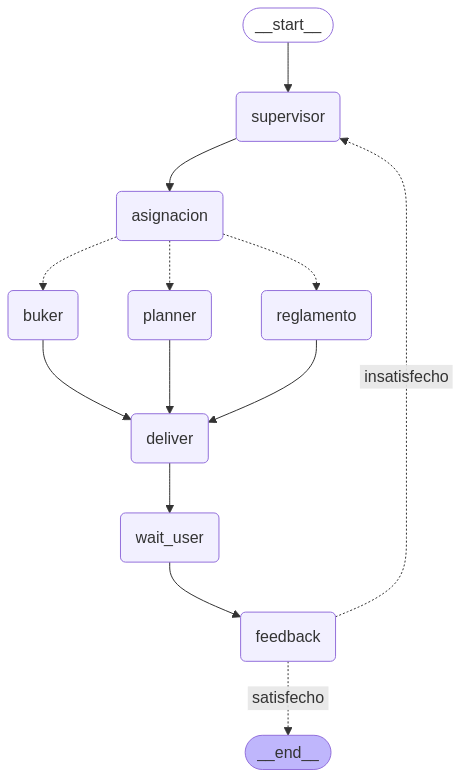

In [19]:
# Agregar Lógica
graph.add_edge(START, "supervisor")
graph.add_edge("supervisor", "asignacion")

# Supervisor decide agente
graph.add_conditional_edges(
    "asignacion",
    asignacion_tarea,
    {
        "buker": "buker",
        "planner": "planner",
        "reglamento": "reglamento"
    }
)
# Todos los agentes vuelven al supervisor
graph.add_edge("buker", "deliver")
graph.add_edge("planner", "deliver")
graph.add_edge("reglamento", "deliver")

# Supervisor pregunta por feedback
graph.add_edge("deliver", "wait_user")
graph.add_edge("wait_user", "feedback")


# Evaluar feedback
graph.add_conditional_edges(
    "feedback",
    evaluar_feedback,
    {
        "satisfecho": END,
        "insatisfecho": "supervisor"
    }
)

# Compilar grafo
graph = graph.compile()
# Mostrar visualización del grafo
display(Image(graph.get_graph().draw_mermaid_png()))